In [1]:
import pandas as pd
import numpy as np
# reading the data
data = pd.read_csv('happiness.csv', index_col=0)
# sort the df by ascending years and descending happiness scores
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)
#diplay first 10 rows
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
46,Finland,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
102,Netherlands,Western Europe,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
140,Sweden,Western Europe,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
103,New Zealand,Australia and New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
6,Australia,Australia and New Zealand,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


Each country's Happiness Score is calculated by summing the seven other variables in the table. Each of these variables reveals a population-weighted average score on a scale running from 0 to 10, that is tracked over time and compared against other countries.

These variables are:

- Economy: real GDP per capita
- Family: social support
- Health: healthy life expectancy
- Freedom: freedom to make life choices
- Trust: perceptions of corruption
- Generosity: perceptions of generosity
- Dystopia: each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

In [2]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))
data.describe()

Our data has 495 rows and 12 columns
Are there missing values? True


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,495.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2016.000000
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.817323
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


# Categorizing by Year and Region
The fun thing about pandas pivot_table is you can get another point of view on your data with only one line of code. Most of the pivot_table parameters use default values, so the only mandatory parameters you must add are data and index. Though it isn't mandatory, we'll also use the value parameter in the next example.

- data is self explanatory - it's the DataFrame you'd like to use
- index is the column, grouper, array (or list of the previous) you'd like to group your data by. It will be displayed in the index column (or columns, if you're passing in a list)
- values (optional) is the column you'd like to aggregate. If you do not specify this then the function will aggregate all numeric columns.

In [3]:
# Using Year as Index
pd.pivot_table(data, index= 'Year', values= "Happiness Score")

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [4]:
# Using Region as Index
pd.pivot_table(data, index = 'Region', values="Happiness Score")

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [5]:
# Creating a multi-index pivot table
pd.pivot_table(data, index = ['Region', 'Year'], values="Happiness Score")

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [6]:
# Using Year as the Columns argument will display the different values for year, and will make for a much better display, 
# like so:
pd.pivot_table(data, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.646667
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


Text(0,0.5,'Happiness Rank')

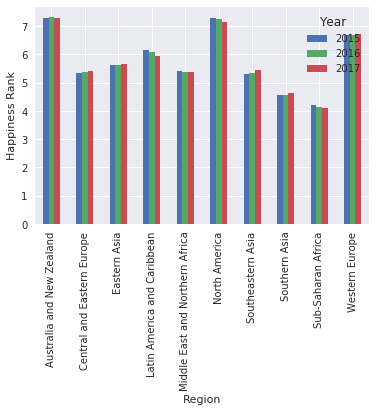

In [7]:
# Visualizing the pivot table using plot()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()  

pd.pivot_table(data, index= 'Region', columns= 'Year', values= "Happiness Score").plot(kind= 'bar')
plt.ylabel("Happiness Rank")

# Manipulating the data using aggfunc
Up until now we've used the average to get insights about the data, but there are other important values to consider. Time to experiment with the aggfunc parameter:

- aggfunc (optional) accepts a function or list of functions you'd like to use on your group (default: numpy.mean). If a list of functions is passed, the resulting pivot table will have hierarchical columns whose top level are the function names.

Let's add the median, minimum, maximum, and the standard deviation for each region. This can help us evaluate how accurate the average is, and if it's really representative of the real picture.

In [8]:
pd.pivot_table(data, index= 'Region', values= "Happiness Score",
               aggfunc= [np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


# Applying a custom function to remove outliers

pivot_table allows you to pass your own custom aggregation functions as arguments. You can either use a lambda function, or create a function. Let's calculate the average number of countries in each region in a given year. We can do this easily using a lambda function, like so:

In [9]:
# Calculating a lambda without removing values
pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, min, max, np.std, lambda x: x.count()/3])

,mean,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.284,7.334,0.020936,2.000000
Central and Eastern Europe,5.371184,4.096,6.609,0.578274,29.000000
Eastern Asia,5.632333,4.874,6.422,0.502100,6.000000
Latin America and Caribbean,6.069074,3.603,7.226,0.728157,22.666667
Middle East and Northern Africa,5.387879,3.006,7.278,1.031656,19.333333
North America,7.227167,6.993,7.427,0.179331,2.000000
Southeastern Asia,5.364077,3.819,6.798,0.882637,8.666667
Southern Asia,4.590857,3.360,5.269,0.535978,7.000000


In [10]:
# This time, let's remove the outliers
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.302500,7.299125,2.000000
Central and Eastern Europe,5.371184,5.449250,29.000000
Eastern Asia,5.632333,5.610125,6.000000
Latin America and Caribbean,6.069074,6.192750,22.666667
Middle East and Northern Africa,5.387879,5.508500,19.333333
North America,7.227167,7.244875,2.000000
Southeastern Asia,5.364077,5.470125,8.666667
Southern Asia,4.590857,4.707500,7.000000


# Categorizing using string manipulation
Up until now we've grouped our data according to the categories in the original table. 
However, we can search the strings in the categories to create our own groups. For example, 
it would be interesting to look at the results by continents. We can do this by looking for 
region names that contains Asia, Europe, etc. To do this, we can first assign our pivot table 
to a variable, and then add our filter:

In [11]:
table = pd.pivot_table(data, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers])

table[table.index.str.contains('Asia')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.632333,5.610125
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [12]:
table[table.index.str.contains('Europe')]

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Central and Eastern Europe,5.371184,5.44925
Western Europe,6.693000,6.84650


In [13]:
table = pd.pivot_table(data, index = ['Region', 'Year'], values='Happiness Score',
               aggfunc= [np.mean, remove_outliers])
  
table.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean remove_outliers
                                     Happiness Score Happiness Score
Region                          Year                                
Middle East and Northern Africa 2015        5.406900        5.515875
                                2017        5.369684        5.425500
Sub-Saharan Africa              2015        4.202800        4.168375
                                2017        4.111949        4.118000

# Handling missing data
We've covered the most powerful parameters of pivot_table thus far, so you can already get a lot out of it if you go 
experiment using this method on your own project. Having said that, it's useful to quickly go through the remaining 
parameters (which are all optional and have default values). The first thing to talk about is missing values.

- dropna is type boolean, and used to indicate you do not want to include columns whose entries are all NaN (default: True)
- fill_value is type scalar, and used to choose a value to replace missing values (default: None).

We don't have any columns where all entries are NaN, but it's worth knowing that if we did pivot_table would drop 
them by default according to dropna definition.

In [14]:
# splitting the happiness score into 4 quantiles or quartiles
score = pd.qcut(data["Happiness Score"], 4)
pd.pivot_table(data, index= ['Region', score], values= "Happiness Score", aggfunc= 'count').head(9)

Happiness Score
Region                     Happiness Score                 
Australia and New Zealand  (2.692, 4.509]               NaN
                           (4.509, 5.283]               NaN
                           (5.283, 6.234]               NaN
                           (6.234, 7.587]               6.0
Central and Eastern Europe (2.692, 4.509]              10.0
                           (4.509, 5.283]              28.0
                           (5.283, 6.234]              46.0
                           (6.234, 7.587]               3.0
Eastern Asia               (2.692, 4.509]               NaN

In [ ]:
# splitting the happiness score into 3 quantiles
score = pd.qcut(data["Happiness Score"], 3)
pd.pivot_table(data, index= ['Region', score], values= "Happiness Score", aggfunc= 'count',
              fill_value= 0)

# Adding total rows/columns
The last two parameters are both optional and mostly useful to improve display:

- margins is type boolean and allows you to add an all row / columns, e.g. for subtotal / grand totals (Default False)
- margins_name which is type string and accepts the name of the row / column that will contain the totals when margins is True (default ‘All’)

Let's use these to add a total to our last table.

In [20]:
# splitting the happiness score into 3 quantiles
score = pd.qcut(data['Happiness Score'], 3)
# creating a pivot table and only displaying the first 9 values 
pd.pivot_table(data, index= ['Region',  score], values= "Happiness Score", aggfunc= 'count', fill_value= 0,
              margins = True, margins_name= 'Total count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (2.692, 4.79]                0.0
                                (4.79, 5.895]                0.0
                                (5.895, 7.587]               6.0
Central and Eastern Europe      (2.692, 4.79]               15.0
                                (4.79, 5.895]               58.0
                                (5.895, 7.587]              14.0
Eastern Asia                    (2.692, 4.79]                0.0
                                (4.79, 5.895]               11.0
                                (5.895, 7.587]               7.0
Latin America and Caribbean     (2.692, 4.79]                4.0
                                (4.79, 5.895]               19.0
                                (5.895, 7.587]              45.0
Middle East and Northern Africa (2.692, 4.79]               18.0
                                (4.79, 5.895]               20.0
                                (5.895, 7.587]              20.0
North America                   (2.692, 4.79]                0.0
                                (4.79, 5.895]                0.0
                                (5.895, 7.587]               6.0
Southeastern Asia               (2.692, 4.79]                6.0
                                (4.79, 5.895]               12.0
                                (5.895, 7.587]               8.0
Southern Asia                   (2.692, 4.79]               13.0
                                (4.79, 5.895]                8.0
                                (5.895, 7.587]               0.0
Sub-Saharan Africa              (2.692, 4.79]              101.0
                                (4.79, 5.895]               16.0
                                (5.895, 7.587]               0.0
Western Europe                  (2.692, 4.79]                0.0
                                (4.79, 5.895]               12.0
                                (5.895, 7.587]              51.0
Total count                                                470.0